## Predicting Chronic Kidney Disease

### Preprocessing

In [270]:
library(readr)

# import dataset, coercing attributes to the appriopriate type
chronic_kidney_disease <- read_csv("chronic_kidney_disease.csv", 
col_types = cols(age = col_number(), 
    al = col_factor(levels = c("0", "1", 
        "2", "3", "4", "5")), ane = col_factor(levels = c("yes", 
        "no")), appet = col_factor(levels = c("good", 
        "poor")), ba = col_factor(levels = c("present", 
        "notpresent")), bgr = col_number(), 
    bp = col_number(), bu = col_number(), 
    cad = col_factor(levels = c("yes", 
        "no")), class = col_factor(levels = c("ckd", 
        "notckd")), dm = col_factor(levels = c("yes", 
        "no")), hemo = col_number(), 
    htn = col_factor(levels = c("yes", 
        "no")), pc = col_factor(levels = c("normal",
        "abnormal")), pcc = col_factor(levels = c("present",
        "notpresent")), pcv = col_number(),
    pe = col_factor(levels = c("yes",
        "no")), pot = col_number(), rbc = col_factor(levels = c("normal",
        "abnormal")), rbcc = col_number(),
    sc = col_number(), sg = col_factor(levels = c("1.005",
        "1.010", "1.015", "1.020", "1.025")),
    sod = col_number(), su = col_factor(levels = c("0",
        "1", "2", "3", "4", "5")), wbcc = col_number()))

# drop attributes with numerous missing values
data <- chronic_kidney_disease[1:nrow(chronic_kidney_disease), -c(3, 4, 5, 6, 7, 10, 13, 14, 15, 16, 17, 18)]

# use only rows containing no missing values
data <- data[complete.cases(data),]

# take random sample of 50% of observations and split into training and testing sets
RNGkind(sample.kind = "Rounding")
set.seed(1)
train <- sample(1:nrow(data), nrow(data)/2)
data.test <- data[-train,]
data.train <- data[train,]

Warning message:
“1012 parsing failures.
row col           expected actual                         file
  1 rbc value in level set      ? 'chronic_kidney_disease.csv'
  1 sod a number                ? 'chronic_kidney_disease.csv'
  1 pot a number                ? 'chronic_kidney_disease.csv'
  2 rbc value in level set      ? 'chronic_kidney_disease.csv'
  2 bgr a number                ? 'chronic_kidney_disease.csv'
... ... .................. ...... ............................
See problems(...) for more details.
”Warning message in RNGkind(sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”

### Decision Tree

          
train.pred ckd notckd
    ckd     98      0
    notckd   9     70

         
test.pred ckd notckd
   ckd     95      0
   notckd  18     65

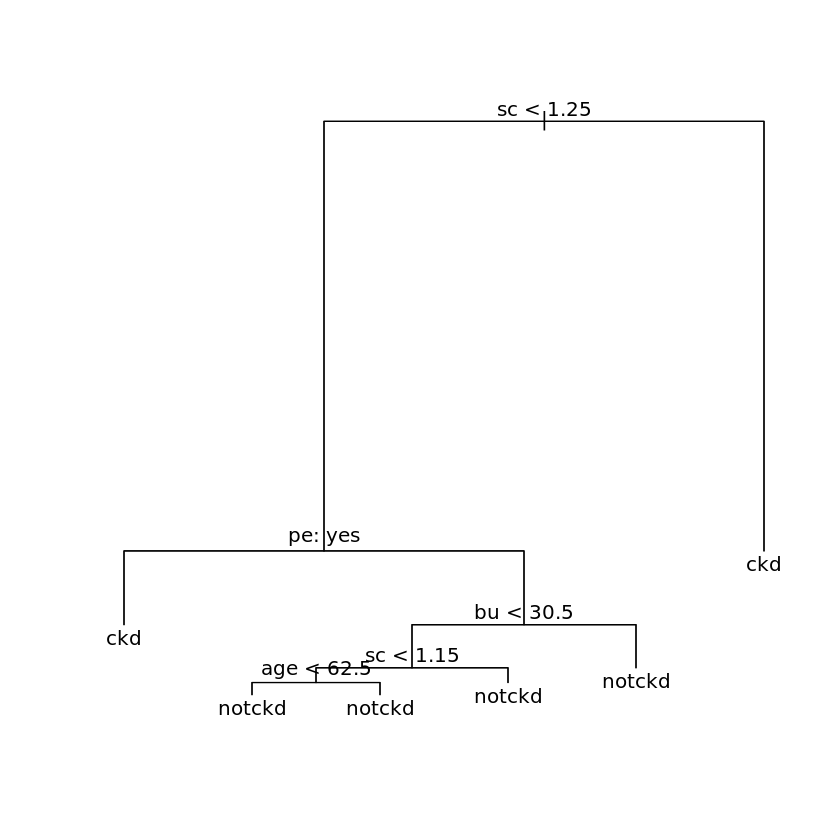

In [271]:
# build decision tree
library(tree)
data.train.tree = tree(class ~ ., data=data.train)
plot(data.train.tree)
text(data.train.tree, pretty=0)
train.pred = predict(data.train.tree, newdata=data.train, type="class")
test.pred = predict(data.train.tree, newdata=data.test, type="class")

# training accuracy
table(train.pred, data.train$class)
# testing accuracy
table(test.pred, data.test$class)

### Neural Network

In [272]:
# drop attributes with numerous missing values
data <- chronic_kidney_disease[1:nrow(chronic_kidney_disease), -c(3, 4, 5, 6, 7, 10, 13, 14, 15, 16, 17, 18)]

# use only rows containing no missing values
data <- data[complete.cases(data),]

In [273]:
library(keras)
str(data)
data$age <- as.numeric(data$age)-1
data$bp <- as.numeric(data$bp)-1
data$bu <- as.numeric(data$bu)-1
data$sc <- as.numeric(data$sc)-1

data$pcc <- to_categorical(as.numeric(data$pcc)-1)
data$ba <- to_categorical(as.numeric(data$ba)-1)
data$htn <- to_categorical(as.numeric(data$htn)-1)
data$dm <- to_categorical(as.numeric(data$dm)-1)
data$cad <- to_categorical(as.numeric(data$cad)-1)
data$appet <- to_categorical(as.numeric(data$appet)-1)
data$pe <- to_categorical(as.numeric(data$pe)-1)
data$ane <- to_categorical(as.numeric(data$ane)-1)
data$class <- to_categorical(as.numeric(data$class)-1)
str(data)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	355 obs. of  13 variables:
 $ age  : num  48 7 62 48 51 60 68 52 53 50 ...
 $ bp   : num  80 50 80 70 80 90 70 100 90 60 ...
 $ pcc  : Factor w/ 2 levels "present","notpresent": 2 2 2 1 2 2 2 1 1 1 ...
 $ ba   : Factor w/ 2 levels "present","notpresent": 2 2 2 2 2 2 2 2 2 2 ...
 $ bu   : num  36 18 53 56 26 25 54 60 107 55 ...
 $ sc   : num  1.2 0.8 1.8 3.8 1.4 1.1 24 1.9 7.2 4 ...
 $ htn  : Factor w/ 2 levels "yes","no": 1 2 2 1 2 1 2 1 1 1 ...
 $ dm   : Factor w/ 2 levels "yes","no": 1 2 1 2 2 1 2 1 1 1 ...
 $ cad  : Factor w/ 2 levels "yes","no": 2 2 2 2 2 2 2 2 2 2 ...
 $ appet: Factor w/ 2 levels "good","poor": 1 1 2 2 1 1 1 1 2 1 ...
 $ pe   : Factor w/ 2 levels "yes","no": 2 2 2 1 2 1 2 2 2 2 ...
 $ ane  : Factor w/ 2 levels "yes","no": 2 2 1 1 2 2 2 1 1 1 ...
 $ class: Factor w/ 2 levels "ckd","notckd": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "problems")=Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1012 obs. of  5 variables:
  ..$ row     : int

In [274]:
n <- nrow(data)
p <- ncol(data)-1

set.seed(1)
train <- sample(n, 0.8*n)
train_data <- data[train, 1:p] %>% as.matrix()
train_labels <- data[train, p+1, drop = FALSE] %>% as.matrix()
test_data <- data[-train, 1:p] %>% as.matrix()
test_labels <- data[-train, p+1] %>% as.matrix()

#train_data <- data[ , 1:12] %>% as.matrix()
#train_labels <- data[ , 13, drop = FALSE] %>% as.matrix()

In [275]:
train_data <- scale(train_data)
col_means_train <- attr(train_data, "scaled:center")
col_stddevs_train <- attr(train_data, "scaled:scale")
test_data <- scale(test_data, center = col_means_train, scale = col_stddevs_train)
attr(test_data, "scaled:center")
attr(test_data, "scaled:scale")
ncol(data)
ncol(train_data)

age          bp       pcc.1       pcc.2        ba.1        ba.2 
52.28873239 75.79577465  0.11267606  0.88732394  0.06338028  0.93661972 
         bu          sc       htn.1       htn.2        dm.1        dm.2 
58.27535211  2.08890845  0.41197183  0.58802817  0.38028169  0.61971831 
      cad.1       cad.2     appet.1     appet.2        pe.1        pe.2 
 0.08802817  0.91197183  0.77112676  0.22887324  0.20422535  0.79577465 
      ane.1       ane.2 
 0.15845070  0.84154930

age         bp      pcc.1      pcc.2       ba.1       ba.2         bu 
15.3722162 14.2149271  0.3167546  0.3167546  0.2440758  0.2440758 49.7994241 
        sc      htn.1      htn.2       dm.1       dm.2      cad.1      cad.2 
 5.9913063  0.4930589  0.4930589  0.4863129  0.4863129  0.2838360  0.2838360 
   appet.1    appet.2       pe.1       pe.2      ane.1      ane.2 
 0.4208490  0.4208490  0.4038460  0.4038460  0.3658077  0.3658077

[1] 13

[1] 20

In [276]:
use_session_with_seed(1)

model <- keras_model_sequential(layers=list(
    layer_dense(units = 11, activation = "relu",
    input_shape = dim(train_data)[2]),
    layer_dense(units = 2, activation = "softmax")
))

Set session seed to 1 (disabled GPU, CPU parallelism)


In [277]:
compile(model,
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy")

In [278]:
print_dot_callback <- callback_lambda(
    on_epoch_end = function(epoch, logs) {
        if (epoch %% 80 == 0) cat("\n")
        cat(".")
    }
)

early_stop <- callback_early_stopping(monitor = "val_loss", patience = 20)

history <- fit(model,
    train_data, train_labels,
    epochs = 100,
    batch_size = 20,
    validation_split = 0.2,
    verbose = 0,
    callbacks = list(early_stop, print_dot_callback))


................................................................................
....................

Trained on 227 samples (batch_size=20, epochs=100)
Final epoch (plot to see history):
    loss: 0.09867
     acc: 0.9692
val_loss: 0.2772
 val_acc: 0.8947 

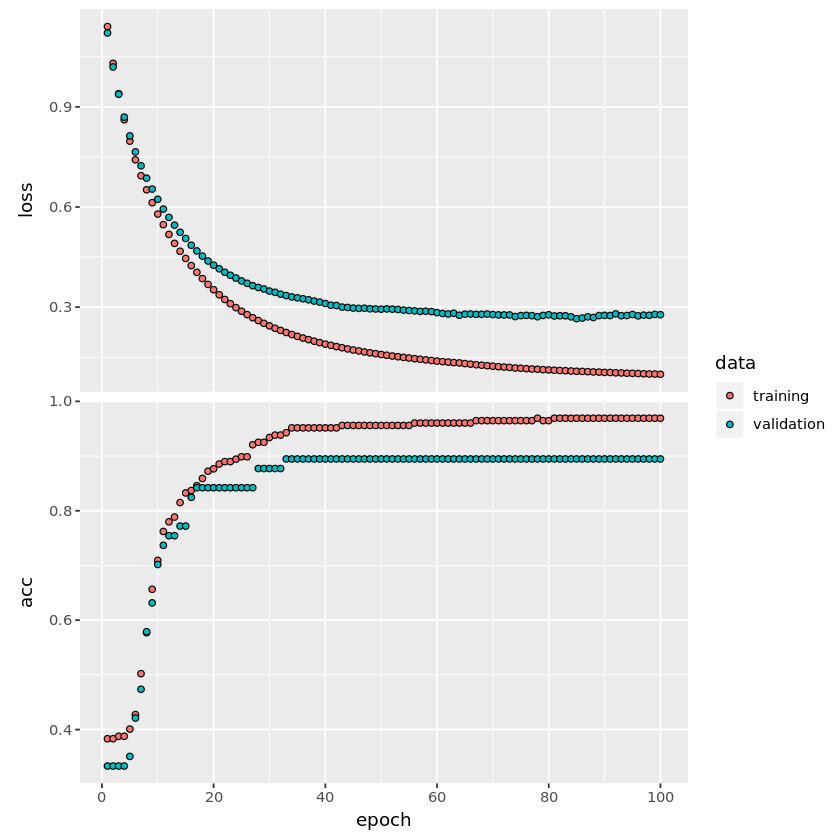

In [279]:
history
plot(history, smooth=F)

In [280]:
eval.results <- evaluate(model,
    test_data,
    test_labels,
    verbose = 0)

eval.results

$loss
[1] 0.2390469

$acc
[1] 0.9014084